In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-vader/sentiment_analysis.csv


# Install required libraries

In [23]:
!pip install -q textblob
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Import necessary modules

In [24]:
import pandas as pd
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Load Dataset

In [25]:
df = pd.read_csv('/kaggle/input/sentiment-analysis-vader/sentiment_analysis.csv')
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


# Clean Text Column

In [26]:
def clean_text(text):
    return str(text).replace("!", "").replace(".", "").strip().lower()

df['clean_text'] = df['text'].apply(clean_text)

# Sentiment with TextBlob

In [27]:
def get_textblob_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    return 'positive' if polarity > 0 else 'negative'

df['textblob_pred'] = df['clean_text'].apply(get_textblob_sentiment)

# Sentiment with VADER

In [28]:
sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    return 'positive' if score > 0 else 'negative'

df['vader_pred'] = df['clean_text'].apply(get_vader_sentiment)

# Visualization

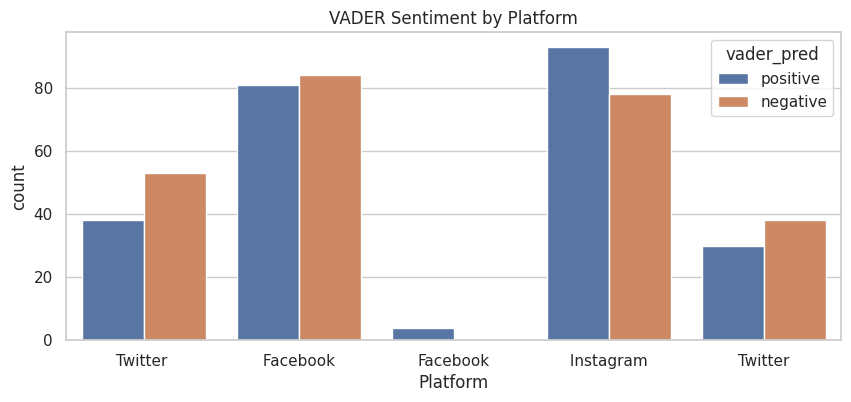

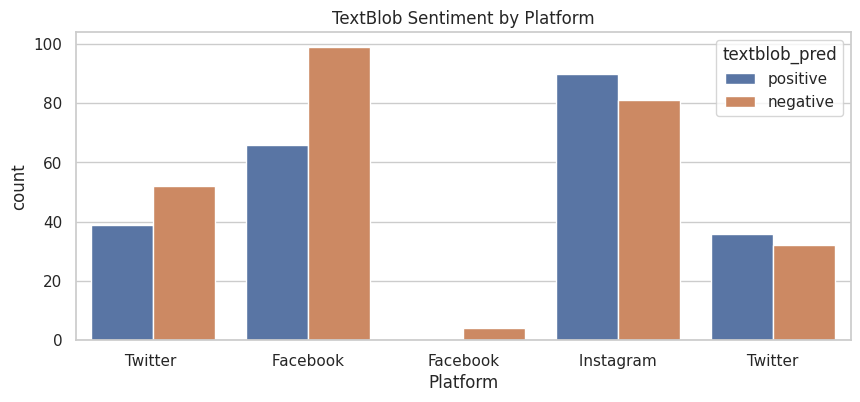

In [29]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Platform', hue='vader_pred')
plt.title('VADER Sentiment by Platform')
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Platform', hue='textblob_pred')
plt.title('TextBlob Sentiment by Platform')
plt.show()

# Evaluation

In [30]:
print("🔍 TextBlob Classification Report")
print(classification_report(df['sentiment'], df['textblob_pred']))

print("🔍 VADER Classification Report")
print(classification_report(df['sentiment'], df['vader_pred']))

🔍 TextBlob Classification Report
              precision    recall  f1-score   support

    negative       0.41      0.83      0.55       134
     neutral       0.00      0.00      0.00       199
    positive       0.61      0.86      0.72       166

    accuracy                           0.51       499
   macro avg       0.34      0.56      0.42       499
weighted avg       0.32      0.51      0.39       499

🔍 VADER Classification Report
              precision    recall  f1-score   support

    negative       0.41      0.77      0.53       134
     neutral       0.00      0.00      0.00       199
    positive       0.60      0.89      0.71       166

    accuracy                           0.50       499
   macro avg       0.33      0.55      0.42       499
weighted avg       0.31      0.50      0.38       499



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classif

# Show Disagreements Between Models

In [31]:
df['models_agree'] = df['textblob_pred'] == df['vader_pred']
print("\nDiscrepant Predictions Between TextBlob & VADER:")
print(df[df['models_agree'] == False][['text', 'textblob_pred', 'vader_pred']])


Discrepant Predictions Between TextBlob & VADER:
                                                  text textblob_pred  \
2                                       Don't angry me      negative   
4                    Those who want to go, let them go      negative   
5                      Its night 2 am, feeling neutral      negative   
7                                           Soooo high      positive   
19         I will never fall in love until I found you      positive   
..                                                 ...           ...   
449  Is heading home from foot surgery and wishing ...      negative   
457  this week of mine was not easy!  but finally i...      negative   
490   And most of us are going to be stuck in an of...      positive   
494  According to , a quarter of families under six...      positive   
498   actually, I wish I was back in Tahoe.  I miss...      negative   

    vader_pred  
2     positive  
4     positive  
5     positive  
7     negative  


# Confusion Matrix

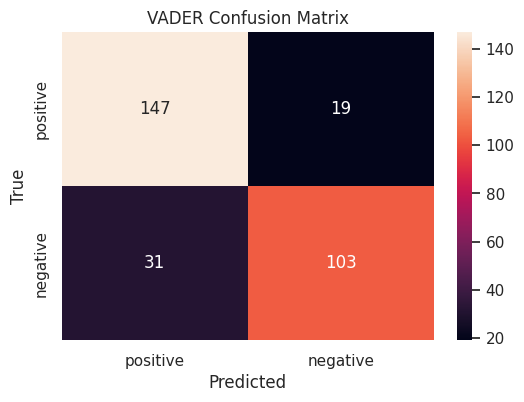

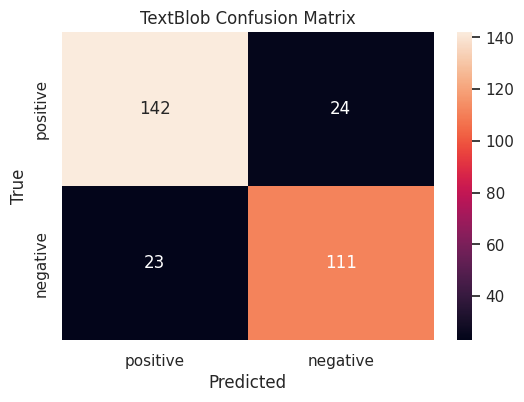

In [32]:
plt.figure(figsize=(6, 4))
cm_vader = confusion_matrix(df['sentiment'], df['vader_pred'], labels=['positive', 'negative'])
sns.heatmap(cm_vader, annot=True, fmt='d', xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.title("VADER Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

plt.figure(figsize=(6, 4))
cm_blob = confusion_matrix(df['sentiment'], df['textblob_pred'], labels=['positive', 'negative'])
sns.heatmap(cm_blob, annot=True, fmt='d', xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.title("TextBlob Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Identifying Discrepant Predictions Between TextBlob and VADER


In [40]:
discrepant_df = df[df['textblob_pred'] != df['vader_pred']]
print(discrepant_df[['text', 'sentiment', 'textblob_pred', 'vader_pred']].head(10))


                                                 text sentiment textblob_pred  \
2                                      Don't angry me  negative      negative   
4                   Those who want to go, let them go  negative      negative   
5                     Its night 2 am, feeling neutral   neutral      negative   
7                                          Soooo high   neutral      positive   
19        I will never fall in love until I found you  positive      positive   
20   oh Maya, I`m so sorry!!  I hope you find her ...   neutral      negative   
32   If it is any consolation I got my BMI tested ...  negative      negative   
37  just in case you wonder, we are really busy to...   neutral      positive   
43   I`d rather do the early run..but I am a morni...   neutral      positive   
45  The girl in the hair salon asked me 'Shall I t...   neutral      positive   

   vader_pred  
2    positive  
4    positive  
5    positive  
7    negative  
19   negative  
20   positiv

# Visualizing Polarity Differences in Discrepant Sentiment Predictions


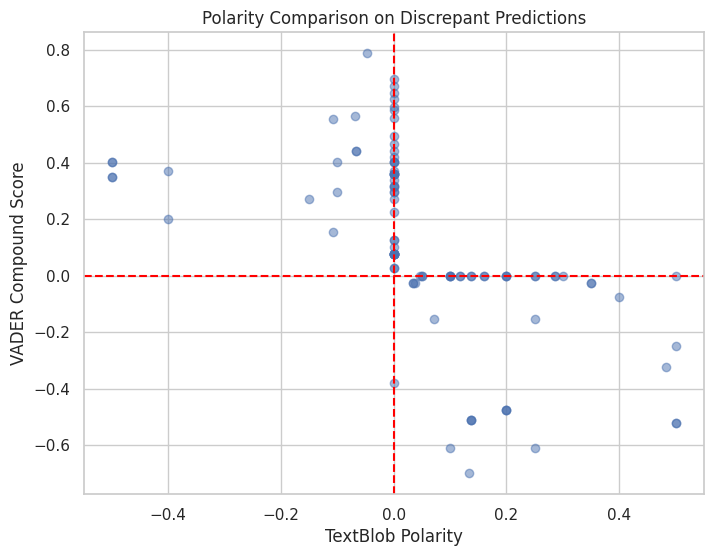

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(discrepant_df['textblob_polarity'], discrepant_df['vader_compound'], alpha=0.5)
plt.axvline(0, color='red', linestyle='--')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('TextBlob Polarity')
plt.ylabel('VADER Compound Score')
plt.title('Polarity Comparison on Discrepant Predictions')
plt.show()


# Distribution of Sentiment Prediction Agreement Across Platforms

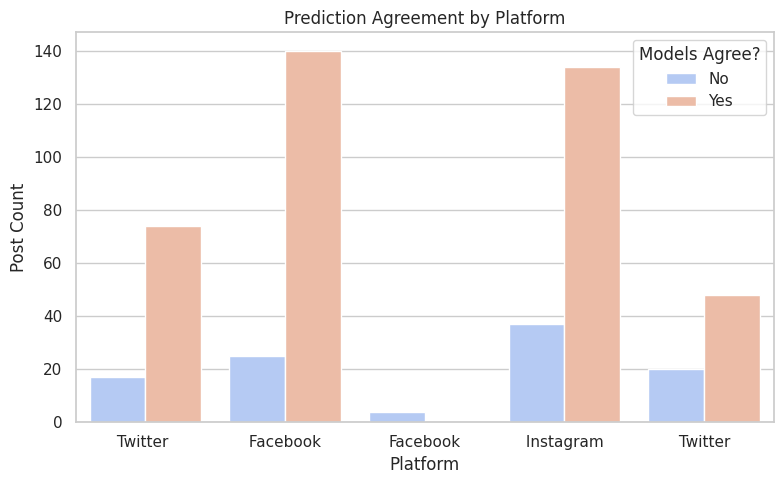

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure seaborn style
sns.set(style="whitegrid")

# Create a column indicating agreement between models
df['models_agree'] = df['textblob_pred'] == df['vader_pred']

# Set up the figure
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Platform', hue='models_agree', palette='coolwarm')

# Customize plot
plt.title('Prediction Agreement by Platform')
plt.xlabel('Platform')
plt.ylabel('Post Count')
plt.legend(title='Models Agree?', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()
